# DP & EDA ON LICHESS CHESS DATASET

This project analyzes 20,000 Lichess online chess games to explore player skill,
opening patterns, game outcomes, and time control behavior using data cleaning,
feature engineering, and exploratory data analysis.

#### Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Section 1: Data Observation & Understanding

In [3]:
df = pd.read_excel("Chess Games Dataset.xlsx", index_col = 'game_id')
df

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
game_id,,,,,,,,,,,,,,,,
1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN,NaN
20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN,NaN
20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,NaN,Mason Attack


#### Dataset Size:

In [4]:
df.shape

(20058, 16)

#### Overview:

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20058 entries, 1 to 20058
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   time_increment     20058 non-null  object
 5   white_id           20058 non-null  object
 6   white_rating       20058 non-null  int64 
 7   black_id           20058 non-null  object
 8   black_rating       20058 non-null  int64 
 9   moves              20058 non-null  object
 10  opening_code       20058 non-null  object
 11  opening_moves      20058 non-null  int64 
 12  opening_fullname   20058 non-null  object
 13  opening_shortname  20058 non-null  object
 14  opening_response   1207 non-null   object
 15  opening_variation  14398 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage

#### Summary:

In [6]:
df.describe(include="all")


,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
count,20058,20058.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058.000000,20058,20058,1207,14398
unique,2,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,NaN,1477,128,3,615
top,True,NaN,Resign,White,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,NaN,Van't Kruijs Opening,Sicilian Defense,Declined,#2
freq,16155,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,NaN,368,2632,503,797
mean,NaN,60.465999,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,4.816981,NaN,NaN,NaN,NaN
std,NaN,33.570585,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,2.797152,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
50%,NaN,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
75%,NaN,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN


Initial Observations:

  1. The dataset contains 20,058 chess games with 16 columns describing ratings, openings, outcomes, and move data.

  2. Numerical features include turns, white_rating, black_rating, and opening_moves.

  3. Categorical features include winner, victory_status, opening_fullname, and time_increment.

  4. Ratings range from ~780 to ~2700, with an average around 1600. 
     - Although new players on Lichess start with a default rating of **1500**, the dataset shows an average rating of around **1600**. 
     - This is expected because active players quickly move away from the starting rating, and Lichess ratings naturally experience slight inflation over time. 
     - Therefore, the higher average rating suggests the dataset contains mostly active or experienced players rather than brand-new accounts.

  5. Most games end by resignation, and white wins slightly more often than black.

  6. The dataset contains many unique openings (over 1,400 full names).

  7. Some columns such as opening_response and opening_variation contain a lot of missing values and will require cleaning in the next section.

# Section 2: Data Cleaning

#### Missing Values:

In [7]:
df.isnull().sum()

rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

As we can see here, values are missing only in 2 columns - "opening_response" and "opening_variation". They have 18851 and 5660 missing values respectively.

1. "opening_response": I will briefly explain what this column means. In chess openings, there are a lot of gambits - meaning sacrifising a pawn or two for advantage in developement - the opponent can choose whether to except this gambit or not. But, this is not applicable to every opening so we have only a few values in that column. 
What we have decided to do is keep the column as it may prove useful for analysis and replace missing values with "Not Applicable". 
Two distinct labels, ‘Refused’ and ‘Declined’, were used to represent the same concept. To maintain consistency and avoid ambiguity, all occurrences of ‘Refused’ were standardized to ‘Declined’.

2. "opening_variation": Every chess opening has many variations. That's what this column displays. But this column adds no new information. Variation name is also displayed in "opening_fullname" but unlike "opening_shortname" this cannot be used for any sort of analysis as for example "Exchange Variation" is in multiple openings. That is why we have decided to delete this column.

In [8]:
df['opening_response'] = df['opening_response'].fillna("Not Applicable")

df['opening_response'] = df['opening_response'].replace("Refused", "Declined")

In [9]:
df = df.drop(columns=['opening_variation'])

#### Verification:

In [10]:
df.isnull().sum()

rated                0
turns                0
victory_status       0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
moves                0
opening_code         0
opening_moves        0
opening_fullname     0
opening_shortname    0
opening_response     0
dtype: int64

#### Checking the 'opening_response' column:

In [11]:
df['opening_response'].value_counts(dropna=False)

opening_response
Not Applicable    18851
Declined            754
Accepted            453
Name: count, dtype: int64

#### Data Type Correction
Numeric columns such as ratings, turn counts, and opening_moves were converted to integer types to enable correct statistical analysis and visualizations. 

In [12]:
df['white_rating'] = df['white_rating'].astype(int)
df['black_rating'] = df['black_rating'].astype(int)
df['turns'] = df['turns'].astype(int)
df['opening_moves'] = df['opening_moves'].astype(int)

#### Standardization:
Categorical text columns were standardized to lowercase to avoid inconsistencies such as “White” vs “white”.

In [13]:
df['winner'] = df['winner'].str.lower()
df['victory_status'] = df['victory_status'].str.lower()
df['opening_shortname'] = df['opening_shortname'].str.lower()
df['opening_fullname'] = df['opening_fullname'].str.lower()
df['opening_response'] = df['opening_response'].str.lower()

#### Duplicate Check

A total of 946 duplicate rows were found in the dataset. Such duplicates likely resulted from the dataset being merged or exported multiple times. To avoid skewed statistics and inflated frequency counts, all duplicate records were removed using `df drop_duplicates()`. After removal, only unique game entries remain in the dataset.


In [14]:
df.duplicated().sum()

np.int64(946)

#### Deleting the duplicates

In [15]:
df = df.drop_duplicates()

#### Verifying

In [16]:
df.duplicated().sum()

np.int64(0)

# Section 3: Feature Engineering 

### Feature - 1
We have created a new feature called "rating_diff", this calculates rating difference of white and black. This helps quantify the relative skill difference between players in each game. Positive indicates White is higher rated and negative indicates black is higher rated.

In [17]:
df['rating_diff'] = df['white_rating'] - df['black_rating']


### Feature - 2
The `avg_rating` feature represents the mean rating of both players. This helps categorize games by overall skill level and analyze trends across rating brackets.

In [18]:
df['avg_rating'] = (df['white_rating'] + df['black_rating']) / 2


### Feature 3 
A new feature `time_control_type` categorizes each game into bullet, blitz, rapid, or classical based on the base time in the time control format. This enables grouped analysis by time format.

In [19]:
def classify_time(x):
    base = int(x.split('+')[0])
    if base < 3:
        return 'bullet'
    elif base <= 8:
        return 'blitz'
    elif base <= 25:
        return 'rapid'
    else:
        return 'classical'

df['time_control_type'] = df['time_increment'].apply(classify_time)


### Feature 4
A numeric version of the game result was created for correlation analysis. White wins are encoded as 1, Black wins as 0, and draws as 0.5.

In [20]:
df['result_binary'] = df['winner'].map({'white': 1, 'black': 0, 'draw': 0.5})


In [21]:
df.head()


,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,rating_diff,avg_rating,time_control_type,result_binary
game_id,,,,,,,,,,,,,,,,,,,
1,False,13,out of time,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,slav defense: exchange variation,slav defense,not applicable,309,1345.5,rapid,1.0
2,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,nimzowitsch defense: kennedy variation,nimzowitsch defense,not applicable,61,1291.5,blitz,0.0
3,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,king's pawn game: leonardis variation,king's pawn game,not applicable,-4,1498.0,blitz,1.0
4,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,queen's pawn game: zukertort variation,queen's pawn game,not applicable,-15,1446.5,rapid,1.0
5,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,philidor defense,philidor defense,not applicable,54,1496.0,classical,1.0


# Section 4: Exploratory Data Analysis

### I] UNIVARIATE ANALYSIS

#### Plot 1
The distribution shows most games are played by intermediate-rated players (1400–1800). Very high-rated and very low-rated games are less common.


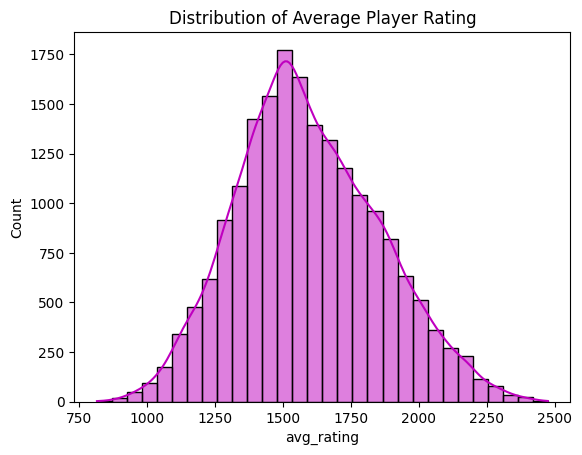

In [22]:
sns.histplot(df['avg_rating'], bins=30, kde=True, color='m')
plt.title("Distribution of Average Player Rating")
plt.show()

#### Plot 2
Most games last between 30–70 turns, with a long tail of shorter and longer games. Extremely long games are rare.



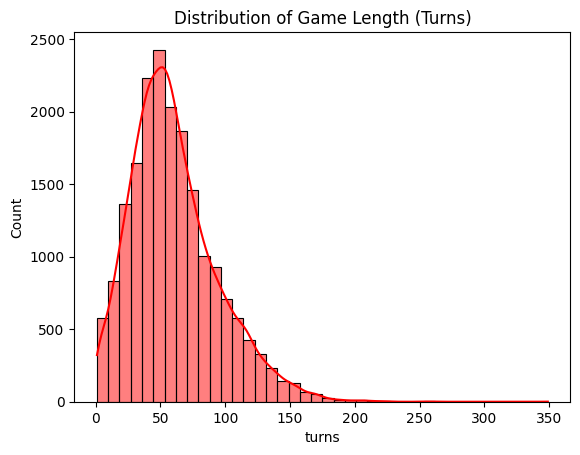

In [23]:
sns.histplot(df['turns'], bins=40, kde=True, color = 'r')
plt.title("Distribution of Game Length (Turns)")
plt.show()


#### Plot 3
White wins slightly more often than Black, which is consistent with general chess statistics. Draws are relatively rare.


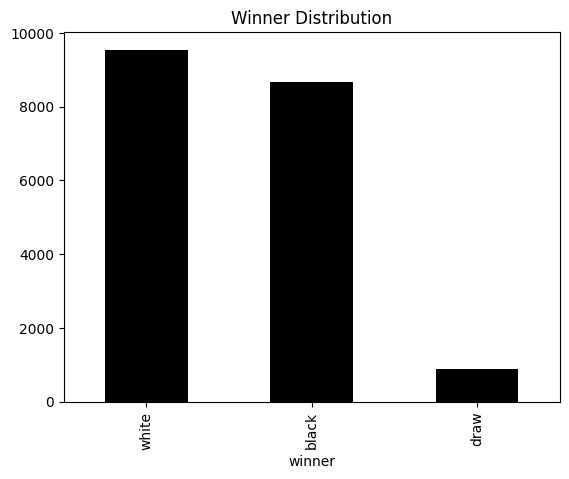

In [24]:
df['winner'].value_counts().plot(kind='bar', color='k')
plt.title("Winner Distribution")
plt.show()


#### Plot 4
Blitz and rapid formats dominate the dataset. Classical games are very uncommon.


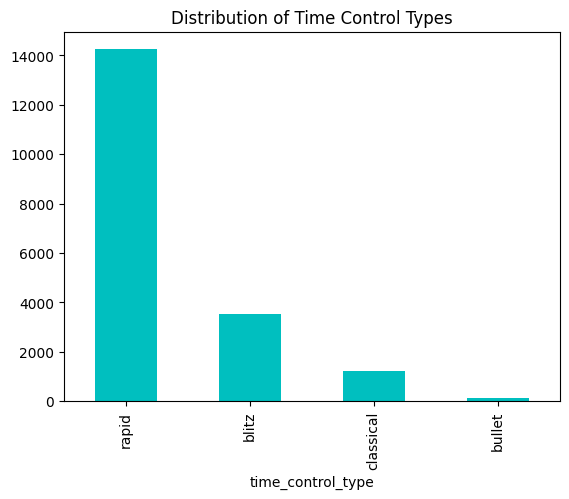

In [25]:
df['time_control_type'].value_counts().plot(kind='bar', color = 'c')
plt.title("Distribution of Time Control Types")
plt.show()


#### Plot 5
Some openings such as Sicilian Defense, french defence, and queen's pawn game appear far more frequently, showing player preference towards well-known systems.


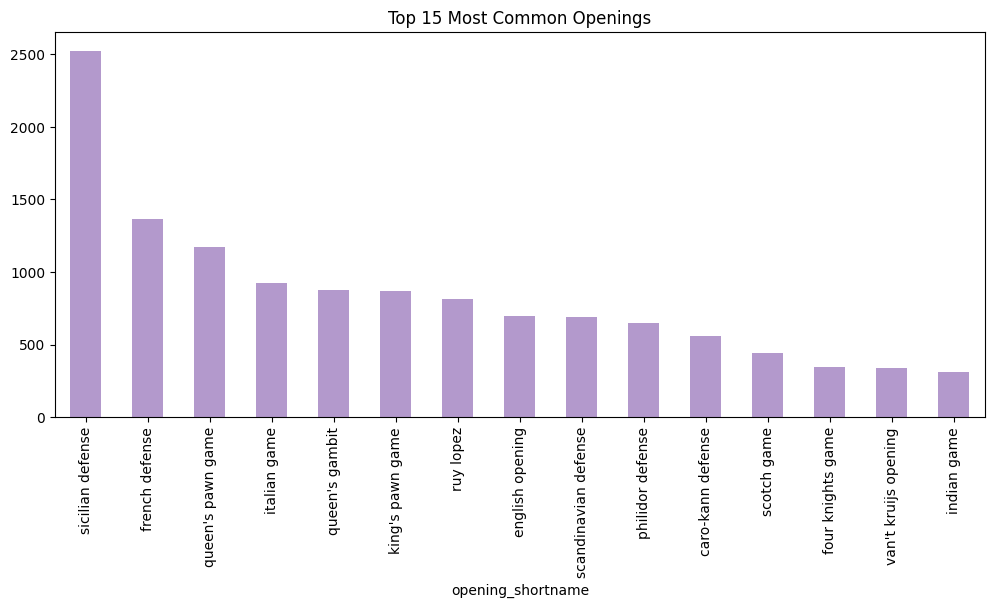

In [27]:
df['opening_shortname'].value_counts().head(15).plot(kind='bar', figsize=(12,5), color = (0.7, 0.6, 0.8))
plt.title("Top 15 Most Common Openings")
plt.show()


### II] BIVARIATE ANALYSIS

#### Plot 6
White wins more often when the rating difference is positive. Black tends to win when the rating difference favors them.


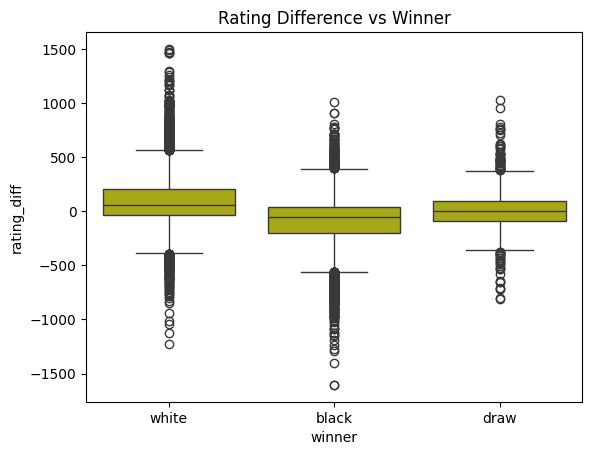

In [26]:
sns.boxplot(x='winner', y='rating_diff', data=df, color = 'y')
plt.title("Rating Difference vs Winner")
plt.show()


#### Plot 7
Some openings show balanced results, while others favor one side more, indicating how opening choice may influence game outcomes.


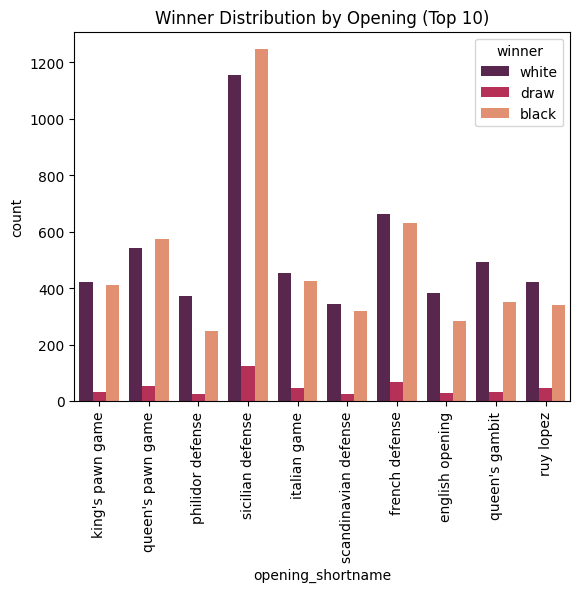

In [28]:
top_openings = df['opening_shortname'].value_counts().head(10).index
subset = df[df['opening_shortname'].isin(top_openings)]

sns.countplot(data=subset, x='opening_shortname', hue='winner', palette='rocket')
plt.title("Winner Distribution by Opening (Top 10)")
plt.xticks(rotation=90)
plt.show()


#### Plot 8
Drawn games tend to be longer on average, while decisive games often finish sooner.


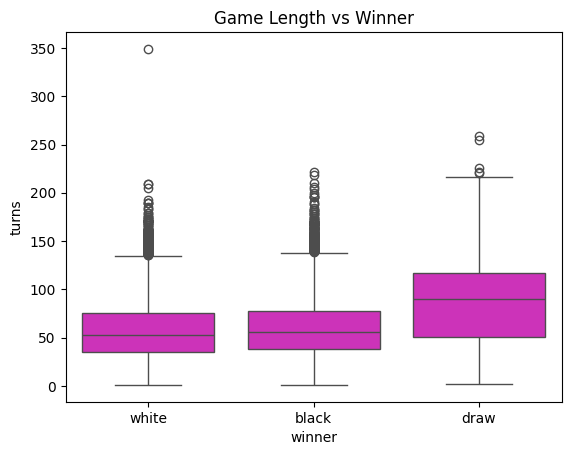

In [29]:
sns.boxplot(x='winner', y='turns', data=df, color = (0.9, 0.1, 0.8))
plt.title("Game Length vs Winner")
plt.show()


### III] MULTIVARIATE ANALYSIS

#### Plot 9
Rating difference has a noticeable correlation with the game result. Turn count shows weaker correlation with player ratings.


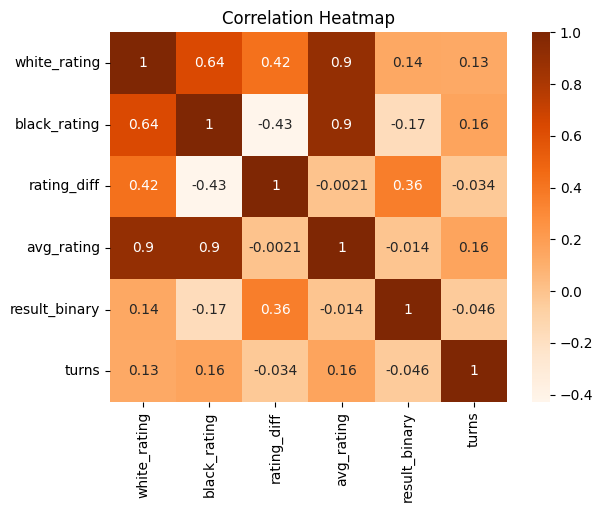

In [30]:
corr_cols = ['white_rating','black_rating','rating_diff','avg_rating','result_binary','turns']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='Oranges')
plt.title("Correlation Heatmap")
plt.show()


#### Plot 10
Higher-rated players tend to win more consistently, especially in games with large rating differences.


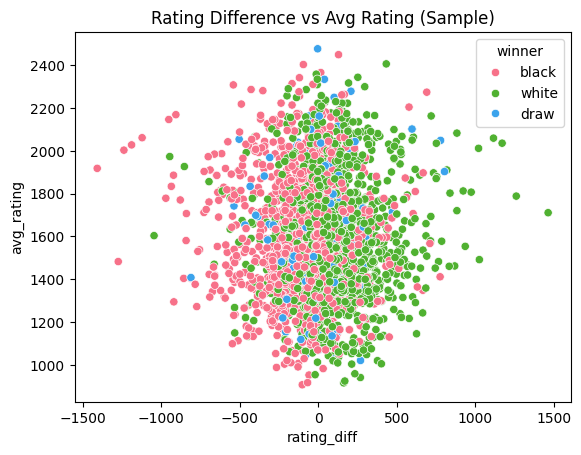

In [31]:
sns.scatterplot(data=df.sample(3000), x='rating_diff', y='avg_rating', hue='winner', palette='husl')
plt.title("Rating Difference vs Avg Rating (Sample)")
plt.show()


#### Plot 11
Different openings lead to different game lengths. Some openings produce sharper, shorter games, while others lead to longer strategic battles.


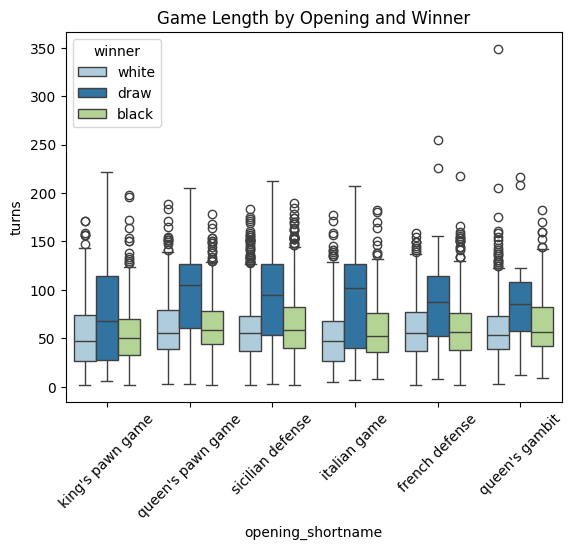

In [32]:
top_open = df['opening_shortname'].value_counts().head(6).index
subset = df[df['opening_shortname'].isin(top_open)]

sns.boxplot(data=subset, x='opening_shortname', y='turns', hue='winner', palette='Paired')
plt.xticks(rotation=45)
plt.title("Game Length by Opening and Winner")
plt.show()


#### Plot 12
No strong pattern is visible between rating difference and game length.


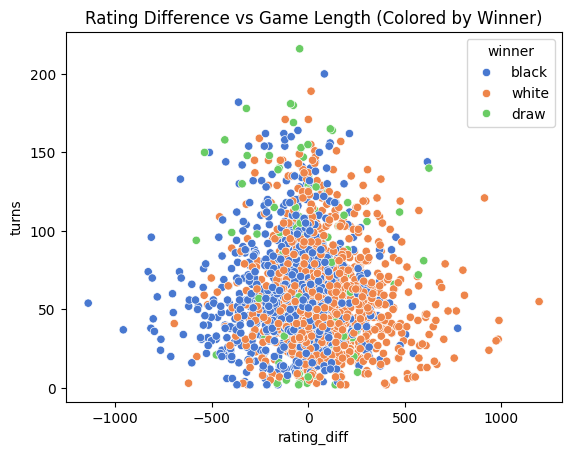

In [33]:
sns.scatterplot(data=df.sample(2000), x='rating_diff', y='turns', hue='winner', palette='muted')
plt.title("Rating Difference vs Game Length (Colored by Winner)")
plt.show()


### Overall Insights from EDA

- Most players fall in the intermediate rating range (1400–1800).
- White wins slightly more often than Black, which matches typical chess trends.
- Blitz and rapid are the most common time controls.
- Rating difference strongly affects win probability.
- Certain openings are far more popular, such as Sicilian, English, and Caro-Kann.
- Draws tend to occur in longer games.
- Some openings show higher win rates for one side.


In [34]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,rating_diff,avg_rating,time_control_type,result_binary
game_id,,,,,,,,,,,,,,,,,,,
1,False,13,out of time,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,slav defense: exchange variation,slav defense,not applicable,309,1345.5,rapid,1.0
2,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,nimzowitsch defense: kennedy variation,nimzowitsch defense,not applicable,61,1291.5,blitz,0.0
3,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,king's pawn game: leonardis variation,king's pawn game,not applicable,-4,1498.0,blitz,1.0
4,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,queen's pawn game: zukertort variation,queen's pawn game,not applicable,-15,1446.5,rapid,1.0
5,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,philidor defense,philidor defense,not applicable,54,1496.0,classical,1.0


# Section 5: Conclusion


This project explored 20,000 online chess games from Lichess, focusing on 
player ratings, openings, time controls, and game outcomes. After cleaning 
duplicates and missing values, several new features such as rating difference, 
average rating, and time control type were engineered to support deeper analysis.

The EDA revealed that most games were played by intermediate-rated players, with 
blitz and rapid time controls being the most common formats. White had a slight 
advantage in win rate, and rating difference showed a clear relationship with 
the game result. Certain openings appeared far more frequently and displayed 
distinct outcome patterns.

Overall, the dataset demonstrated meaningful trends that align with real-world 
chess statistics, and feature engineering significantly enhanced the insights 
drawn from the analysis.
